In [3]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

df_train = pd.read_csv('KDDTrain+.txt')
df_test = pd.read_csv('KDDTest+.txt')

columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
            'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
            'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
            'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
            'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
            'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
            'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
            'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
            'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack',
            'level']

df_train.columns = columns
df_test.columns = columns

df_train.drop('level', axis=1, inplace=True)
df_test.drop('level', axis=1, inplace=True)

df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


Zbiór danych NSL-KDD to ulepszenie oryginalnego zbioru KDD Cup 99. KDD Cup 99 został stworzony w ramach konkursu Knowledge Discovery and Data Mining Cup 1999, zorganizowanego w celu zachęcenia do rozwoju technik detekcji ataków w systemach komputerowych.  
  
Oryginalny KDD Cup 99 zawierał dane zebrane z symulacji ruchu sieciowego w laboratoryjnym środowisku, a uczestnicy konkursu mieli za zadanie zidentyfikować ataki na sieci. Jednak później stwierdzono, że oryginalny zbiór danych ma pewne wady, takie jak nadmierna liczba powtarzających się rekordów.  
  
NSL-KDD powstał jako poprawiona wersja, jest bardziej zróżnicowany i realistyczny, a także bardziej odpowiedni do zastosowań w dzisiejszych systemach komputerowych. Zbiór ten składa się z różnych rodzajów ataków, takich jak ataki DoS (Denial of Service), probing, R2L (Remote-to-Local), U2R (User-to-Root) itp.  
  
Obecnie zbiór NSL-KDD jest używany jako benchmark w dziedzinie badawczej dotyczącej bezpieczeństwa sieci komputerowych i jest stosowany do testowania skuteczności różnych algorytmów i metod detekcji ataków. 

In [4]:
print(df_train.shape)
print(df_test.shape)
print(len(columns))

(125972, 42)
(22543, 42)
43


Cechy opisujące ruch sieciowy w zbiorze danych:
1. **duration:**  
Opisuje czas trwania połączenia w sekundach. Jest to liczba całkowita.

2. **protocol_type:**  
Określa typ protokołu komunikacyjnego używanego w danym połączeniu, np. "tcp", "udp", "icmp". Jest to atrybut kategoryczny.

3. **service:**  
Określa usługę, która jest używana w danym połączeniu, np. "http", "ftp", "telnet". Jest to atrybut kategoryczny.

4. **flag:**  
Oznacza flagę ustawioną w trakcie połączenia, np. "SF" (Established), "S0" (Connection attempt), "REJ" (Connection rejected).  
Jest to atrybut kategoryczny.

5. **src_bytes:**  
Ilość przesłanych bajtów z komputera źródłowego do docelowego w danym połączeniu. Jest to liczba całkowita.

6. **dst_bytes:**  
Ilość przesłanych bajtów z komputera docelowego do źródłowego w danym połączeniu. Jest to liczba całkowita.

7. **land:**  
Wartość binarna (0 lub 1) określająca, czy połączenie jest "land attack" (atak polegający na wysłaniu pakietu do ofiary   
z fałszywym adresem źródłowym równym adresem docelowym).

8. **wrong_fragment:**  
Liczba "złych" fragmentów w pakietach w danym połączeniu. Jest to liczba całkowita.

9. **urgent:**  
Liczba pakietów z flagą "urgent" (o wysokim priorytecie) w danym połączeniu. Jest to liczba całkowita.

10. **hot:**  
Określa liczbę "gorących" punktów (czyli często odwiedzanych) na serwerze. Jest to liczba całkowita.

11. **num_failed_logins:**  
Liczba nieudanych prób logowania przed danym połączeniem. Jest to liczba całkowita.

12. **logged_in:**  
Wartość binarna (0 lub 1) określająca, czy użytkownik jest zalogowany w danym połączeniu.

13. **num_compromised:**  
Liczba komputerów kompromitowanych w danym połączeniu. Jest to liczba całkowita.

14. **root_shell:**  
Wartość binarna (0 lub 1) określająca, czy w danym połączeniu został uzyskany dostęp do powłoki roota (administratora).

15. **su_attempted:**  
Wartość binarna (0 lub 1) określająca, czy w danym połączeniu była próba użycia polecenia su do uzyskania uprawnień roota.

16. **num_root:**  
Liczba uzyskanych dostępów roota w danym połączeniu. Jest to liczba całkowita.

17. **num_file_creations:**  
Liczba utworzonych plików w wyniku danego połączenia. Jest to liczba całkowita.

18. **num_shells:**  
Liczba powłok (shells), uruchomionych w wyniku danego połączenia. Jest to liczba całkowita.

19. **num_access_files:**  
Liczba dostępów do plików w wyniku danego połączenia. Jest to liczba całkowita.

20. **num_outbound_cmds:**  
Liczba wychodzących poleceń w danym połączeniu. W oryginalnym zbiorze KDD Cup '99 ta cecha zawsze wynosi 0, co oznacza,   
że nie jest informatywna.

21. **is_host_login:**  
Wartość binarna (0 lub 1) określająca, czy logowanie do hosta w danym połączeniu było wykonane jako część  
innego połączenia.

22. **is_guest_login:**  
Wartość binarna (0 lub 1) określająca, czy logowanie jako gość miało miejsce w danym połączeniu.

23. **count:**  
Liczba połączeń zidentyfikowanych w ciągu ostatnich 2 sekund przed danym połączeniem. Jest to liczba całkowita.

24. **srv_count:**  
Liczba połączeń do tego samego serwera (usługi) w ciągu ostatnich 2 sekund przed danym połączeniem.  
Jest to liczba całkowita.

25. **serror_rate:**  
Procent błędów związanych z połączeniem, zidentyfikowanych w ciągu ostatnich 2 sekund przed danym połączeniem.

26. **srv_serror_rate:**  
Procent błędów związanych z daną usługą, zidentyfikowanych w ciągu ostatnich 2 sekund przed danym połączeniem.

27. **rerror_rate:**  
Procent odrzuconych połączeń, zidentyfikowanych w ciągu ostatnich 2 sekund przed danym połączeniem.

28. **srv_rerror_rate:**  
Procent odrzuconych połączeń związanych z daną usługą, zidentyfikowanych w ciągu ostatnich 2 sekund przed   
danym połączeniem.

29. **same_srv_rate:**  
Procent połączeń do tego samego serwera (usługi) w ciągu ostatnich 2 sekund przed danym połączeniem.

30. **diff_srv_rate:**  
Procent połączeń do różnych serwerów (usług) w ciągu ostatnich 2 sekund przed danym połączeniem.

31. **srv_diff_host_rate:**  
Procent połączeń do różnych hostów w ciągu ostatnich 2 sekund przed danym połączeniem.

32. **dst_host_count:**  
Liczba połączeń do tego samego docelowego hosta w ciągu ostatnich 2 sekund przed danym połączeniem.  
Jest to liczba całkowita.

33. **dst_host_srv_count:**  
Liczba połączeń do tej samej usługi na docelowym hoście w ciągu ostatnich 2 sekund przed danym połączeniem.  
Jest to liczba całkowita.

34. **dst_host_same_srv_rate:**  
Procent połączeń do tej samej usługi na docelowym hoście w ciągu ostatnich 2 sekund przed danym połączeniem.

35. **dst_host_diff_srv_rate:**  
Procent połączeń do różnych usług na docelowym hoście w ciągu ostatnich 2 sekund przed danym połączeniem.

36. **dst_host_same_src_port_rate:**  
Procent połączeń do tego samego portu źródłowego na docelowym hoście w ciągu ostatnich 2 sekund przed  
danym połączeniem.

37. **dst_host_srv_diff_host_rate:**  
Procent połączeń do różnych hostów dla tej samej usługi na docelowym hoście w ciągu ostatnich 2 sekund  
przed danym połączeniem.

38. **dst_host_serror_rate:**  
Procent błędów związanych z połączeniem na docelowym hoście w ciągu ostatnich 2 sekund przed danym połączeniem.

39. **dst_host_srv_serror_rate:**  
Procent błędów związanych z daną usługą na docelowym hoście w ciągu ostatnich 2 sekund przed danym połączeniem.

40. **dst_host_rerror_rate:**  
Procent odrzuconych połączeń na docelowym hoście w ciągu ostatnich 2 sekund przed danym połączeniem.

41. **dst_host_srv_rerror_rate:**  
Procent odrzuconych połączeń związanych z daną usługą na docelowym hoście w ciągu ostatnich 2 sekund przed  
danym połączeniem.

42. **label:**  
Oznaczenie klasy, do której należy dane połączenie. Może to być etykieta opisująca rodzaj połączenia,  
np. "normal" (dla połączeń normalnych) lub etykieta opisująca rodzaj ataku.


#### Stworzenie etykiet mówiących czy dany rekord to atak DDoS czy też nie:
Krok potrzebny, ponieważ oryginalny zbiór zawierał informacje o różnych rodzajach ataków bez podziału na grupy

In [5]:
ddos_types = ['apache2','back','land','neptune','mailbomb','pod','processtable',
              'smurf', 'teardrop','udpstorm','worm']

is_ddos_train = []

for attack in df_train['attack']:
    if attack in ddos_types:
        is_ddos_train.append(1)
    else:
        is_ddos_train.append(0)

df_train['is_ddos'] = is_ddos_train

is_ddos_test = []

for attack in df_test['attack']:
    if attack in ddos_types:
        is_ddos_test.append(1)
    else:
        is_ddos_test.append(0)

df_test['is_ddos'] = is_ddos_test

df_train.drop('attack', axis=1, inplace=True)
df_test.drop('attack', axis=1, inplace=True)

df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,is_ddos
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1


#### Sprawdzenie czy w zbiorze danych występują puste komórki

In [6]:
max(df_train.isnull().sum())

0

In [7]:
max(df_test.isnull().sum())

0

Brak pustych komórek

#### Sprawdzenie zbalansowania zbioru:

In [8]:
df_train['is_ddos'].value_counts()

is_ddos
0    80045
1    45927
Name: count, dtype: int64

Niezbalansowanie zbioru wynosi mniej więcej 2:1, co oznacza, że zbiór jest całkiem dobrze zbalansowany i nie ma potrzeby użycia technik radzenia sobie z niezbalansowaniem zbioru.

#### Zastosowanie metody one hot encoding na zmiennych kategorycznych:

Krok potrzebny, aby przekształcić informacje tekstowe (kategorie), na informacje binarne. W tym kroku każda z kategorii w danej kolumnie jest zastępowana przez znacznik 1 lub 0, co jest naturalną formą prezentacji danych dla sieci neuronowych.

In [9]:
protocol_encoding_train = pd.get_dummies(df_train['protocol_type'], dtype=int)
service_encoding_train = pd.get_dummies(df_train['service'], dtype=int)
flag_encoding_train = pd.get_dummies(df_train['flag'], dtype=int)

df_train = df_train.join(protocol_encoding_train)
df_train = df_train.join(service_encoding_train)
df_train = df_train.join(flag_encoding_train)


protocol_encoding_test = pd.get_dummies(df_test['protocol_type'], dtype=int)
service_encoding_test = pd.get_dummies(df_test['service'], dtype=int)
flag_encoding_test = pd.get_dummies(df_test['flag'], dtype=int)

df_test = df_test.join(protocol_encoding_test)
df_test = df_test.join(service_encoding_test)
df_test = df_test.join(flag_encoding_test)

df_train.drop(['protocol_type', 'service', 'flag'], inplace=True, axis=1)
df_test.drop(['protocol_type', 'service', 'flag'], inplace=True, axis=1)

is_ddos_column_train = df_train.pop('is_ddos')
df_train['is_ddos'] = is_ddos_column_train

is_ddos_column_test = df_test.pop('is_ddos')
df_test['is_ddos'] = is_ddos_column_test

df_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH,is_ddos
0,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
print(df_train.shape)
print(df_test.shape)

(125972, 123)
(22543, 117)


#### Usunięcie ze zbioru treningowego kolumn, które nie występuje w zbiorze testowym:

In [11]:
columns_train = list(df_train.columns)
columns_test = list(df_test.columns)

print(columns_train)
print(columns_test)

for column in columns_train:
    if column not in columns_test:
        print("Deleting", column, "column.")
        df_train.pop(column)

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'icmp', 'tcp', 'udp', 'IRC', 'X11', 'Z39_50', 'aol', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'harvest', 'hostnames', 'http', 'http_2784', 'http_443', 'http_8001', 'imap4', 'iso_t

Jak widać część kolumn ze zbioru treningowego nie występuje w zbiorze testowym, co może być jednym z symptomów różnic w dystrybucji danych w zbiorach

In [12]:
print(df_train.shape)
print(df_test.shape)

(125972, 117)
(22543, 117)


#### Standaryzacja danych:

In [13]:
scaler = StandardScaler()

Y_train = df_train['is_ddos']
df_train.drop('is_ddos', inplace=True, axis=1)
df_train_scaled = scaler.fit_transform(df_train)
X_train = df_train_scaled

Y_test = df_test['is_ddos']
df_test.drop('is_ddos', inplace=True, axis=1)
df_test_scaled = scaler.fit_transform(df_test)
X_test = df_test_scaled

In [14]:
print(X_train.shape)
print(X_test.shape)

(125972, 116)
(22543, 116)


#### Stworzenie architektury sieci neuronowej:

Sieć składa się z dwóch warstw ukrytych, każda po 64 neurony(ilość neuronów została dobrana eksperymentalnie). W architekturze sieci zastosowano wiele techinik poprawiających jej wydajność:
- optymalizacja Adam - metoda optymalizacyjna doboru wag, szczególnie użyteczna w sieciach o małych rozmiarach
- binarna entropia krzyżowa - funkcja strat o wysokiej skuteczności dla problemów klasyfikacji binarnej
- early_stoping - metoda regularyzacji zapobiegająca przeuczeniu modelu 

In [15]:

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dropout(0.4), 
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                7488      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11713 (45.75 KB)
Trainable params: 11713 (45.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Trenowanie modelu: 
Trenowanie modelu odbywa się przez 100 epok z tym że może zostać zakończone przedwcześnie, gdy przez 10 kolejnych epok nie zostanie zmniejszona wartość funkcji strat. Wartość funkcji strat wyliczana jest z wyznaczonego zbioru walidacyjnego (20% danych treningowych).

In [16]:

from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, test_size=0.2, shuffle=True)

history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_valid, y_valid), 
    callbacks=[early_stopping]
)


Epoch 1/100
3150/3150 [==============================] - 24s 6ms/step - loss: 0.0535 - accuracy: 0.9847 - val_loss: 0.0099 - val_accuracy: 0.9976
Epoch 2/100
3150/3150 [==============================] - 18s 6ms/step - loss: 0.0114 - accuracy: 0.9974 - val_loss: 0.0056 - val_accuracy: 0.9986
Epoch 3/100
3150/3150 [==============================] - 18s 6ms/step - loss: 0.0080 - accuracy: 0.9980 - val_loss: 0.0056 - val_accuracy: 0.9984
Epoch 4/100
3150/3150 [==============================] - 19s 6ms/step - loss: 0.0065 - accuracy: 0.9984 - val_loss: 0.0051 - val_accuracy: 0.9987
Epoch 5/100
3150/3150 [==============================] - 18s 6ms/step - loss: 0.0075 - accuracy: 0.9985 - val_loss: 0.0039 - val_accuracy: 0.9988
Epoch 6/100
3150/3150 [==============================] - 20s 6ms/step - loss: 0.0055 - accuracy: 0.9987 - val_loss: 0.0042 - val_accuracy: 0.9988
Epoch 7/100
3150/3150 [==============================] - 20s 6ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.0046 -

#### Wizualizacja procesu treningu sieci neuronowej

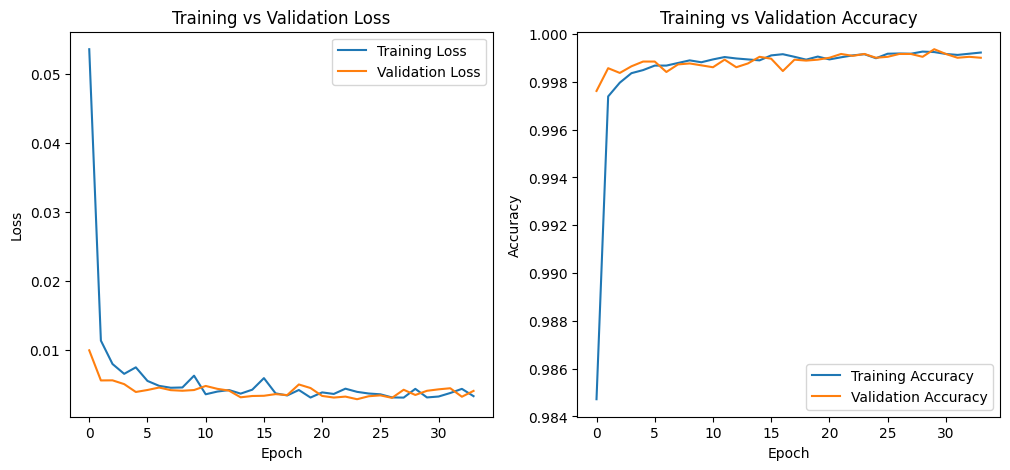

In [17]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Ocena na zbiorze testowym:

In [18]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

705/705 [==============================] - 1s 2ms/step - loss: 1.9823 - accuracy: 0.9429
Test Loss: 1.9823253154754639, Test Accuracy: 0.9428647756576538


Nasz model uzyskał dokładność na poziomie 95% procent co oznacza, że z taką skutecznością będzie w stanie wykryć atak DDoS w konkretnej sieci.

Jak widać skuteczność wykrywania ataków DDoS na zbiorze testowym(94,6%), różni się od skuteczności wykrywania na zbiorze walidacyjnym(99,94%). Jako, że zbiór walidacyjny jest tworzony bezpośrednio ze zbioru uczącego, możemy przypuszczać, że przygotowany przez autorów zbioru - zbiór testowy, ma nieco inną dystrybucję danych od zbioru treningowego. Mimo wszystko skuteczność 94,6% na zbiorze testowym również jest zadowalająca.

#### Przygotowanie raportu

In [27]:
import pandas as pd
import openpyxl
from openpyxl.styles import Font, Color, PatternFill

df_test_original = pd.read_csv('KDDTest+.txt')
df_test_original.columns = columns

df_test_modified = df_test_original.drop(['level', 'attack'], axis=1)

df_test_for_prediction = df_test_modified.copy()
predictions = model.predict(X_test)
predictions_binary = [1 if x > 0.5 else 0 for x in predictions]

df_test_modified['is_ddos'] = predictions_binary 

df_test_modified.to_excel('raport.xlsx', index=False)

file_path = 'raport.xlsx'
df_test_modified.to_excel(file_path, index=False)

book = openpyxl.load_workbook(file_path)
sheet = book.active

column_index = openpyxl.utils.cell.column_index_from_string('AP')

for row in range(2, sheet.max_row + 1): 
    cell = sheet.cell(row=row, column=column_index)
    cell.fill = PatternFill(start_color="FFFF00", end_color="FFFF00", fill_type="solid")


book.save(file_path)

705/705 [==============================] - 3s 4ms/step
